In [37]:
import numpy as np
import pandas as pd

df_wine = pd.read_csv('../../data/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

print('Class labels', np.unique(df_wine['Class label']))

df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

特徴量の尺度を揃える

とりあえず、正規化した値

In [39]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

X_train_norm[:3, :]

array([[0.64619883, 0.83201581, 0.4248366 , 0.46236559, 0.27160494,
        0.35172414, 0.09704641, 0.68      , 0.18987342, 0.23623446,
        0.45744681, 0.28571429, 0.19400856],
       [0.6871345 , 0.15612648, 0.65359477, 0.43548387, 0.7654321 ,
        0.67931034, 0.50632911, 0.74      , 0.2943038 , 0.3250444 ,
        0.81914894, 0.63369963, 0.68259629],
       [0.67836257, 0.15019763, 0.65359477, 0.59677419, 0.38271605,
        0.69655172, 0.61392405, 0.32      , 0.62025316, 0.35168739,
        0.75531915, 0.52747253, 0.71825963]])

In [40]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


標準化した値

In [41]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

X_train_std[:3, :]

array([[ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
        -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
        -0.20017028, -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, -0.09065504,  2.34147876,
         1.01675879,  0.66299475,  1.0887425 , -0.49293533,  0.13152077,
         1.33982592,  0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605,  0.81104754,  0.13597904,
         1.09807851,  1.16326665, -0.64419483,  1.25249578,  0.25863359,
         1.06806189,  0.1308109 ,  1.62934866]])

ロバストスケーリング

In [42]:
from sklearn.preprocessing import RobustScaler

rb = RobustScaler()

X_train_rb = rb.fit_transform(X_train)
X_test_rb = rb.fit_transform(X_test)

X_test_rb[:3, :]

array([[ 0.76043956,  0.01058201,  1.18699187, -0.31279621,  0.7816092 ,
         0.83733333,  0.44992296,  0.53521127,  0.33460076,  0.56761269,
         0.41726619,  0.12110727,  1.86138614],
       [-0.64615385, -0.30687831,  0.69918699,  0.04739336,  0.27586207,
        -0.34666667, -0.19106317,  0.87323944, -0.6539924 , -0.5509182 ,
         1.3381295 , -0.3633218 , -0.83168317],
       [ 1.30549451, -0.01058201,  0.43902439, -0.78672986, -0.09195402,
         0.304     ,  0.2835131 ,  0.02816901,  0.79087452,  0.21702838,
         0.10071942,  0.57093426,  1.6369637 ]])

L1正則化

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))

print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [44]:
lr.intercept_


array([-1.26375745, -1.21544413, -2.37043678])

ゼロになっている特徴量は、決定に寄与していない

In [45]:
lr.coef_

array([[ 1.24619873,  0.18049418,  0.74561709, -1.16340752,  0.        ,
         0.        ,  1.16067881,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55596197,  2.50921646],
       [-1.53848957, -0.38628004, -0.99643488,  0.36488183, -0.05925435,
         0.        ,  0.66753476,  0.        ,  0.        , -1.93213681,
         1.23642756,  0.        , -2.23201759],
       [ 0.1356389 ,  0.1685932 ,  0.35721607,  0.        ,  0.        ,
         0.        , -2.43773521,  0.        ,  0.        ,  1.56355546,
        -0.81884703, -0.49283598,  0.        ]])

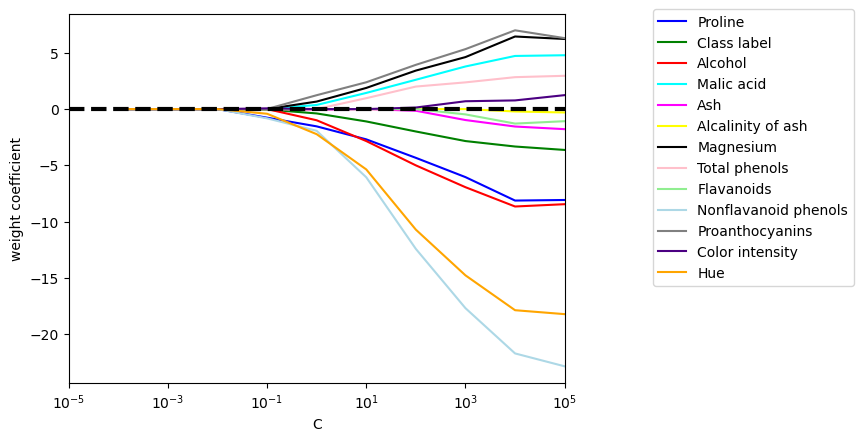

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10 ** c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10 ** c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column - 1], color=color)


plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()